#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/2_content_bold_img/tfidf_4000.csv')
data

,id,一一,一下,一併,一半,一同,一定,一手,一月,一生,...,默默,點心,點擊,點綴,點選,黴菌,鼓勵,齊全,龐大,success_x
0,NMN2,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.011834,1
1,ZENLET-The-Dual,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,1
2,hhl-penzhai,0.000000,0.000000,0.000000,0.05409,0.0,0.032648,0.0,0.0,0.0,...,0.018721,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,1
3,scion-36,0.000000,0.007976,0.010767,0.00000,0.0,0.018530,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.010319,0.01269,0.000000,0.0,0.000000,1
4,amt-cube,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,ryanxpkking,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0
5444,groundzero1,0.041502,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0
5445,rogerspace,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.031859,0.0,0.000000,0
5446,holidayy2013,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4204
0    1244
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.63
Recall: 0.63
Precision: 0.85
F1-Score: 0.72
F0.5-Score: 0.79
F0.3-Score: 0.82


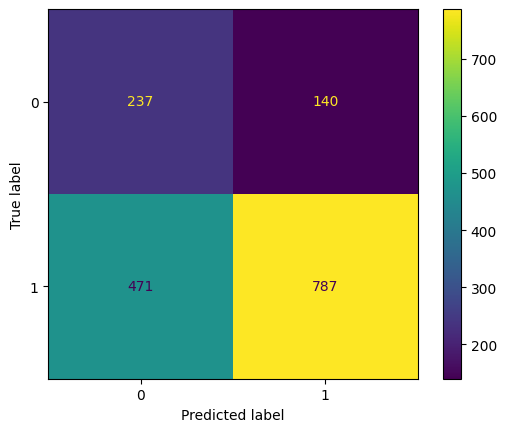

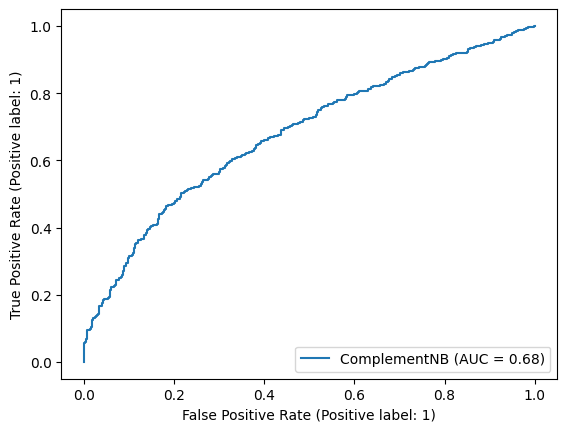

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----


Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


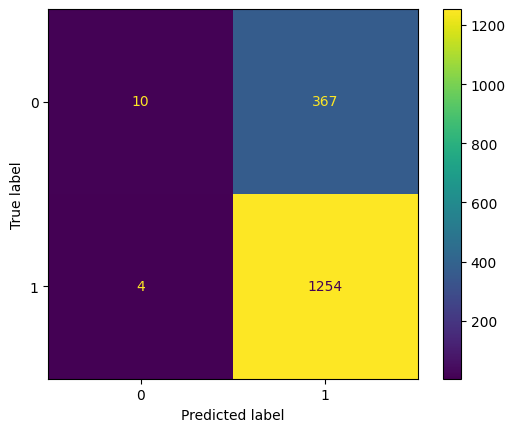

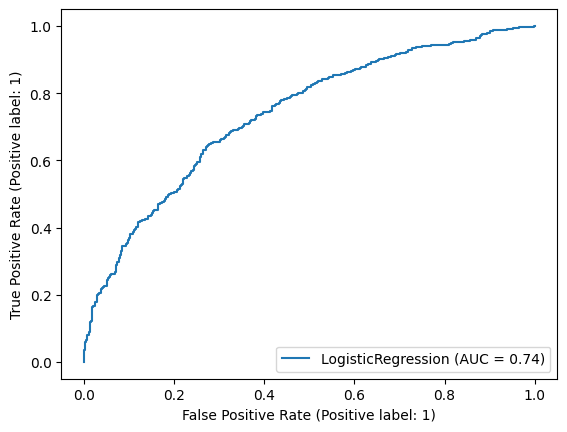

---- Under Sample Data ----
Accuracy: 0.65
Recall: 0.64
Precision: 0.86
F1-Score: 0.74
F0.5-Score: 0.81
F0.3-Score: 0.84


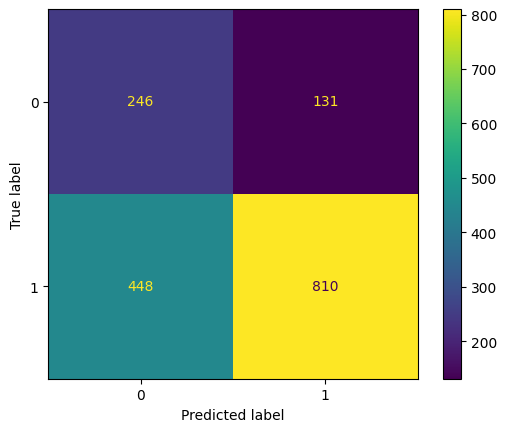

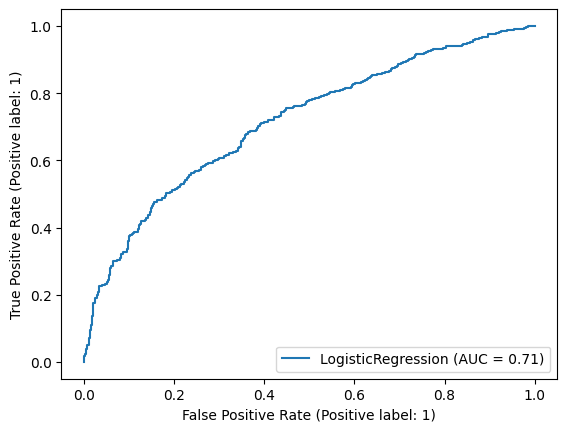

---- Over Sample Data ----
Accuracy: 0.72
Recall: 0.78
Precision: 0.85
F1-Score: 0.81
F0.5-Score: 0.84
F0.3-Score: 0.85


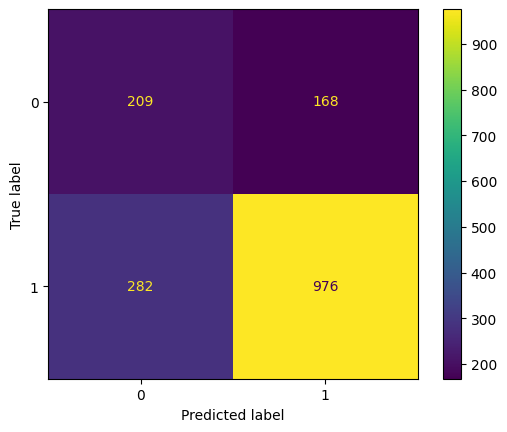

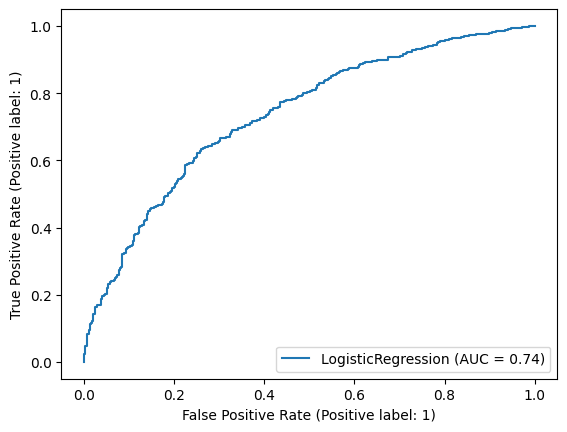

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


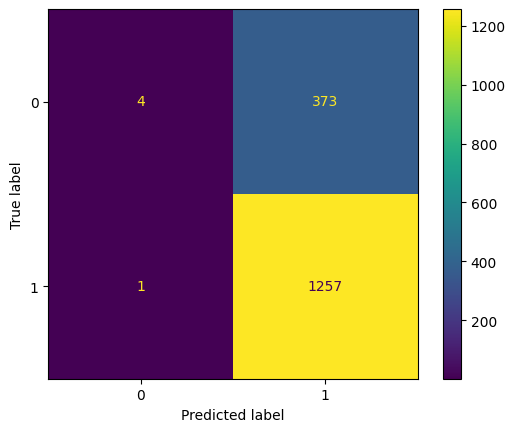

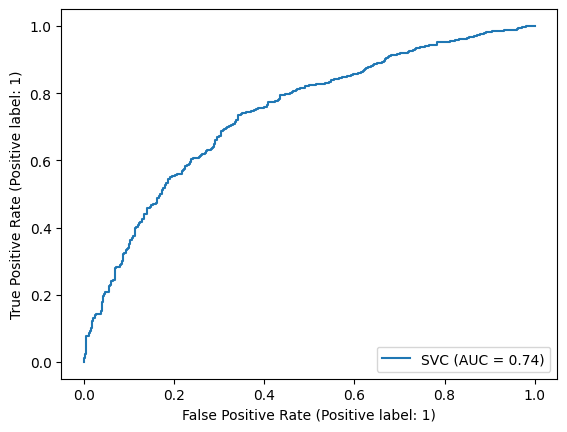

---- Under Sample Data ----
Accuracy: 0.63
Recall: 0.62
Precision: 0.86
F1-Score: 0.72
F0.5-Score: 0.8
F0.3-Score: 0.83


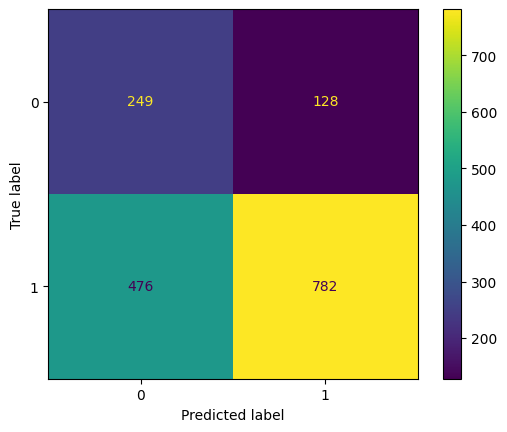

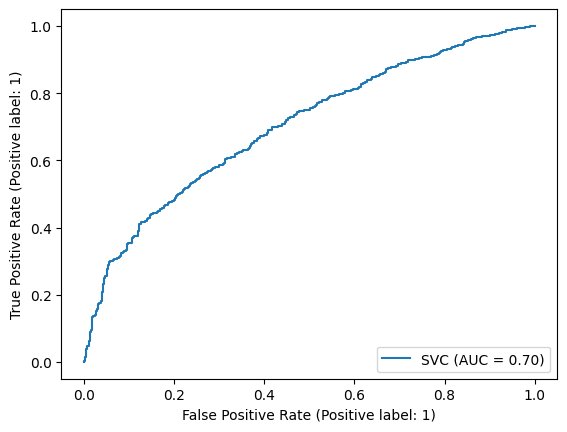

---- Over Sample Data ----
Accuracy: 0.77
Recall: 0.94
Precision: 0.8
F1-Score: 0.87
F0.5-Score: 0.82
F0.3-Score: 0.81


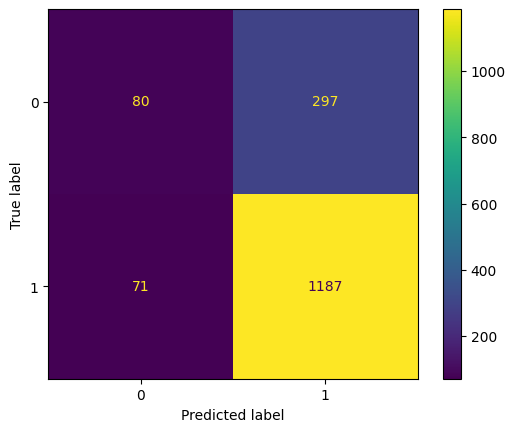

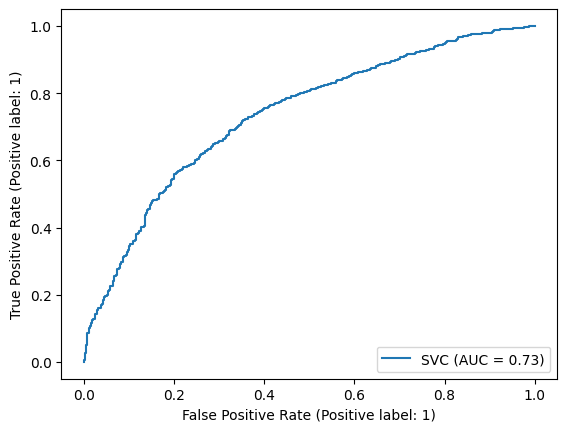

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.78
Recall: 0.99
Precision: 0.78
F1-Score: 0.87
F0.5-Score: 0.82
F0.3-Score: 0.79


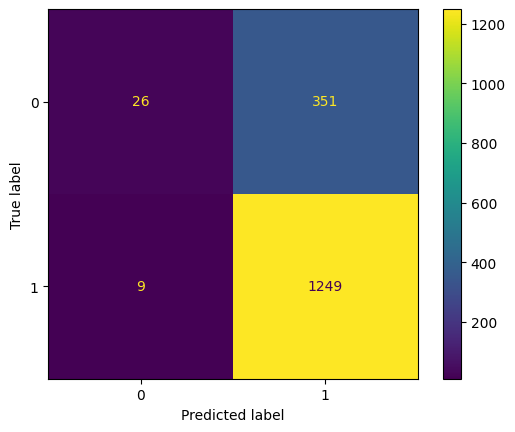

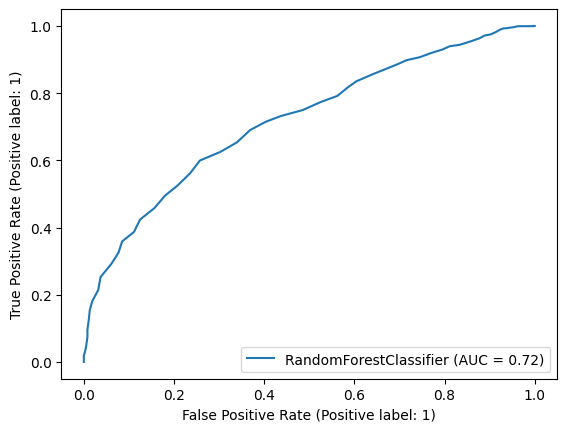

---- Under Sample Data ----
Accuracy: 0.67
Recall: 0.67
Precision: 0.88
F1-Score: 0.76
F0.5-Score: 0.82
F0.3-Score: 0.85


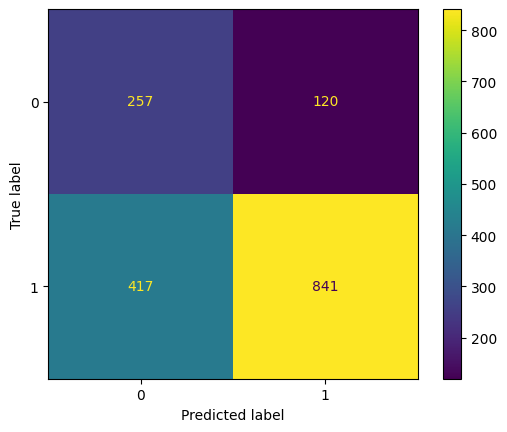

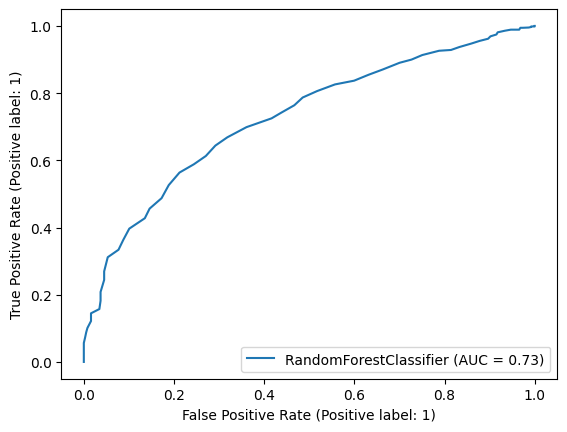

---- Over Sample Data ----
Accuracy: 0.77
Recall: 0.96
Precision: 0.79
F1-Score: 0.87
F0.5-Score: 0.82
F0.3-Score: 0.8


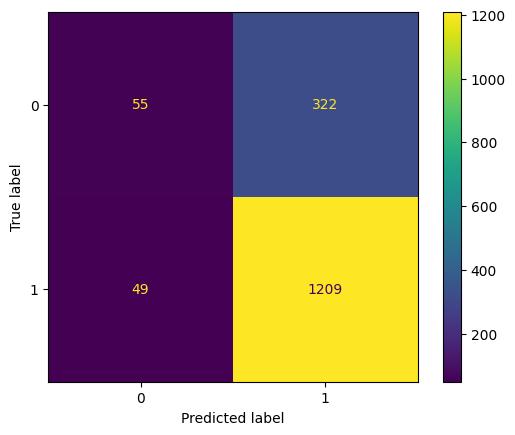

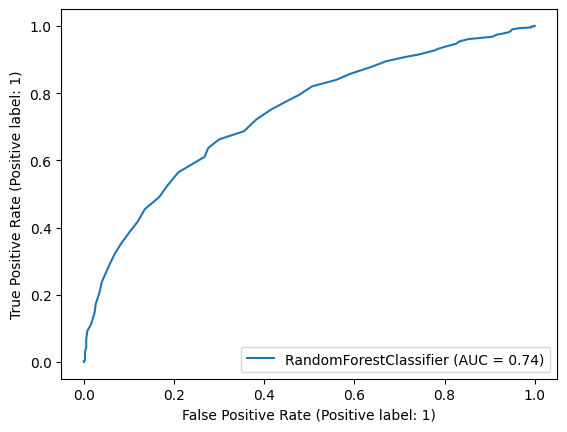

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 0.97
Precision: 0.78
F1-Score: 0.86
F0.5-Score: 0.81
F0.3-Score: 0.79


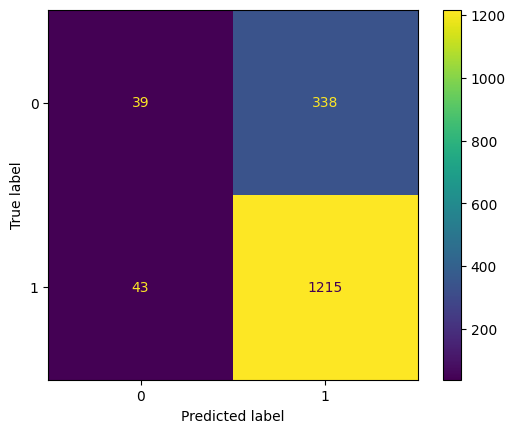

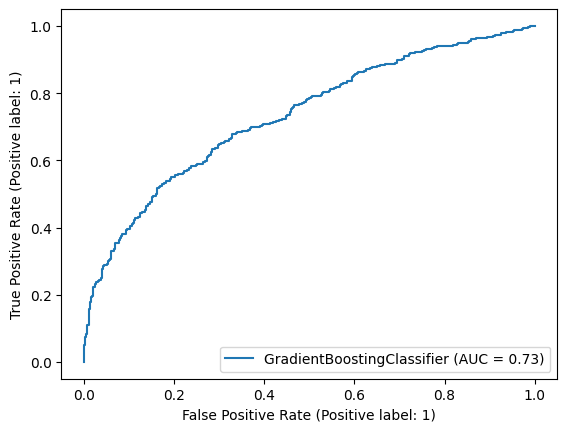

---- Under Sample Data ----
Accuracy: 0.67
Recall: 0.66
Precision: 0.88
F1-Score: 0.75
F0.5-Score: 0.83
F0.3-Score: 0.86


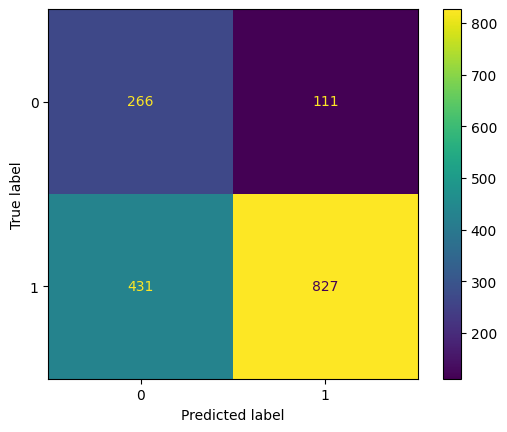

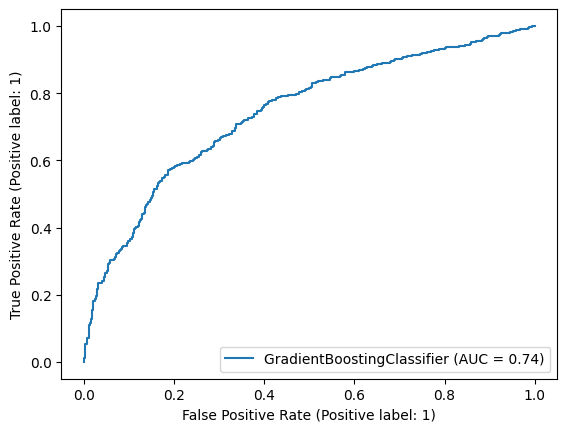

---- Over Sample Data ----
Accuracy: 0.72
Recall: 0.77
Precision: 0.85
F1-Score: 0.81
F0.5-Score: 0.84
F0.3-Score: 0.85


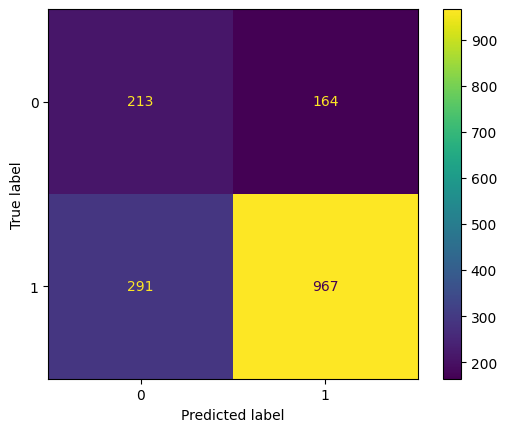

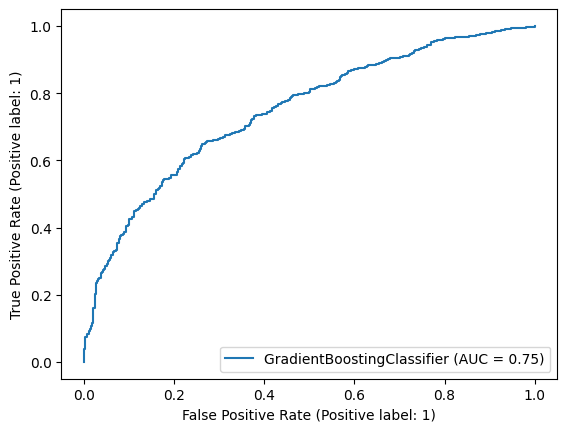

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
